In [1]:
import pandas as pd
import numpy as np
from path import Path
import datetime as dt
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
from dateutil.parser import parse
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create path
file_path = Path('resources/data/')

# Import data

bostonRev = pd.read_csv(f'{file_path}/boston_reviews.csv')
bostonCal = pd.read_csv(f'{file_path}/boston_calendar.csv')
bostonList = pd.read_csv(f'{file_path}/boston_listings.csv')

seattleRev = pd.read_csv(f'{file_path}/seattle_reviews.csv')
seattleCal = pd.read_csv(f'{file_path}/seattle_calendar.csv')
seattleList = pd.read_csv(f'{file_path}/seattle_listings.csv')

# Combine similar dataframes
airbnbRev = pd.concat([bostonRev, seattleRev])
airbnbCal = pd.concat([bostonCal, seattleCal])
airbnbList = pd.concat([bostonList, seattleList])

In [4]:
airbnbCal.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
airbnbList.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [6]:
airbnbList.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

# Best neighborhoods

Text(0.5, 1.0, 'Number of Airbnb Listings in Seattle Neighbourhoods')

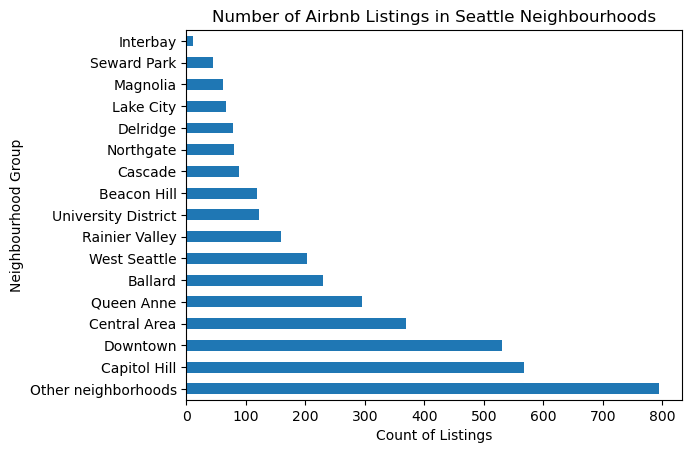

In [7]:
# Seattle
seattleList['neighbourhood_group_cleansed'].value_counts().plot(kind = 'barh')
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.title("Number of Airbnb Listings in Seattle Neighbourhoods")

In [8]:
# Seattle
#counts = seattleList['neighbourhood_cleansed'].value_counts()
#mask = counts > 50
#filtered_counts = counts[mask]
#filtered_counts.plot(kind='barh')
#plt.xlabel("Count of Listings")
#plt.ylabel("Neighbourhood Group")
#plt.title("Number of Airbnb Listings in Seattle Neighbourhoods")

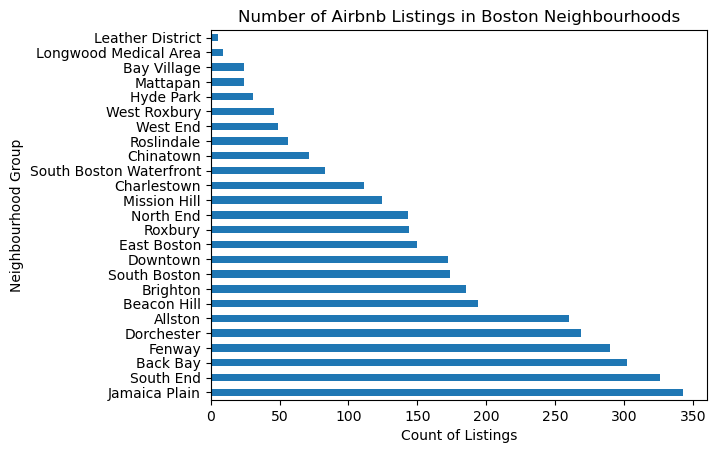

In [9]:
# Boston
bostonList['neighbourhood_cleansed'].value_counts().plot(kind = 'barh')
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.title("Number of Airbnb Listings in Boston Neighbourhoods");

In [90]:
# Determine best neighborhoods via highest airbnb review value
# Seattle
seattleList.groupby('neighbourhood_cleansed').mean().sort_values('review_scores_value', ascending = False)[['review_scores_value']].head(15)

,review_scores_value
neighbourhood_cleansed,
Fauntleroy,10.000000
Genesee,9.833333
Gatewood,9.812500
Maple Leaf,9.805556
Rainier Beach,9.800000
Madrona,9.794872
North College Park,9.785714
Laurelhurst,9.777778
Highland Park,9.777778


In [91]:
# Seattle
bostonList.groupby('neighbourhood_cleansed').mean().sort_values('review_scores_value', ascending = False)[['review_scores_value']].head(15)

,review_scores_value
neighbourhood_cleansed,
Leather District,9.666667
Roslindale,9.580000
West Roxbury,9.454545
Jamaica Plain,9.450847
South Boston,9.379085
Charlestown,9.368421
Longwood Medical Area,9.333333
North End,9.325000
South End,9.263941


In [92]:
# Overall
airbnbList.groupby('neighbourhood_cleansed').mean().sort_values('review_scores_value', ascending = False)[['review_scores_value']].head(15)

,review_scores_value
neighbourhood_cleansed,
Fauntleroy,10.000000
Genesee,9.833333
Gatewood,9.812500
Maple Leaf,9.805556
Rainier Beach,9.800000
Madrona,9.794872
North College Park,9.785714
Highland Park,9.777778
Laurelhurst,9.777778


# Busiest times to visit each city?

## Clean

### Seattle

In [13]:
# extract month and year from date
get_month1 = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').month
seattleCal['month'] = seattleCal['date'].apply(get_month1)
get_year1 = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').year
seattleCal['year'] = seattleCal['date'].apply(get_year1)

In [14]:
# change available column from f, t to 0, 1
seattleCal['available'] = seattleCal['available'].map({'f': 0, 't': 1})
seattleCal.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,1,$85.00,1,2016
1,241032,2016-01-05,1,$85.00,1,2016
2,241032,2016-01-06,0,NaN,1,2016
3,241032,2016-01-07,0,NaN,1,2016
4,241032,2016-01-08,0,NaN,1,2016


In [15]:
seattleCal['year'].value_counts()

2016    1385934
2017       7636
Name: year, dtype: int64

In [16]:
seattleCal.loc[seattleCal['year'] == 2017, 'month'].value_counts()

1    7636
Name: month, dtype: int64

In [17]:
seattleCal.loc[seattleCal['year'] == 2016, 'month'].value_counts()

3     118358
5     118358
7     118358
8     118358
10    118358
12    118358
4     114540
6     114540
9     114540
11    114540
2     110722
1     106904
Name: month, dtype: int64

This data might be unusable as the 2017 data is all from January

### Boston

In [18]:
# extract month and year from date
get_month2 = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').month
bostonCal['month'] = bostonCal['date'].apply(get_month2)
get_year2 = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').year
bostonCal['year'] = bostonCal['date'].apply(get_year2)

In [19]:
# change available column from f, t to 0, 1
bostonCal['available'] = bostonCal['available'].map({'f': 0, 't': 1})
bostonCal.head()

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,0,NaN,9,2017
1,12147973,2017-09-04,0,NaN,9,2017
2,12147973,2017-09-03,0,NaN,9,2017
3,12147973,2017-09-02,0,NaN,9,2017
4,12147973,2017-09-01,0,NaN,9,2017


In [20]:
bostonCal['year'].value_counts()

2017    889328
2016    419562
Name: year, dtype: int64

In [21]:
bostonCal.loc[bostonCal['year'] == 2017, 'month'].value_counts()

8    111166
1    111166
7    111166
5    111166
3    111166
6    107580
4    107580
2    100408
9     17930
Name: month, dtype: int64

In [22]:
bostonCal.loc[bostonCal['year'] == 2016, 'month'].value_counts()

12    111166
10    111166
11    107580
9      89650
Name: month, dtype: int64

### Overall

In [23]:
# extract month and year from date
get_month3 = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').month
airbnbCal['month'] = airbnbCal['date'].apply(get_month3)
get_year3 = lambda date: dt.datetime.strptime(date, '%Y-%m-%d').year
airbnbCal['year'] = airbnbCal['date'].apply(get_year3)

In [24]:
# change available column from f, t to 0, 1
airbnbCal['available'] = airbnbCal['available'].map({'f': 0, 't': 1})
airbnbCal.head()

,listing_id,date,available,price,month,year
0,12147973,2017-09-05,0,NaN,9,2017
1,12147973,2017-09-04,0,NaN,9,2017
2,12147973,2017-09-03,0,NaN,9,2017
3,12147973,2017-09-02,0,NaN,9,2017
4,12147973,2017-09-01,0,NaN,9,2017


## Visualization

### Seattle

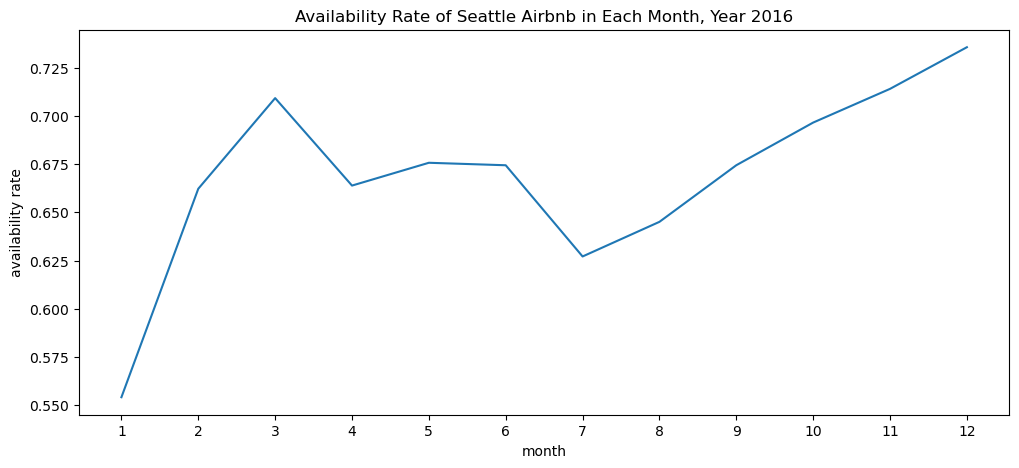

In [25]:
# calculate availablity rate
availabilityRateSeattle = seattleCal[seattleCal['year'] == 2016].groupby('month').mean()['available']

# plot availablity rate in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('availability rate')
plt.title('Availability Rate of Seattle Airbnb in Each Month, Year 2016')
plt.plot(availabilityRateSeattle)

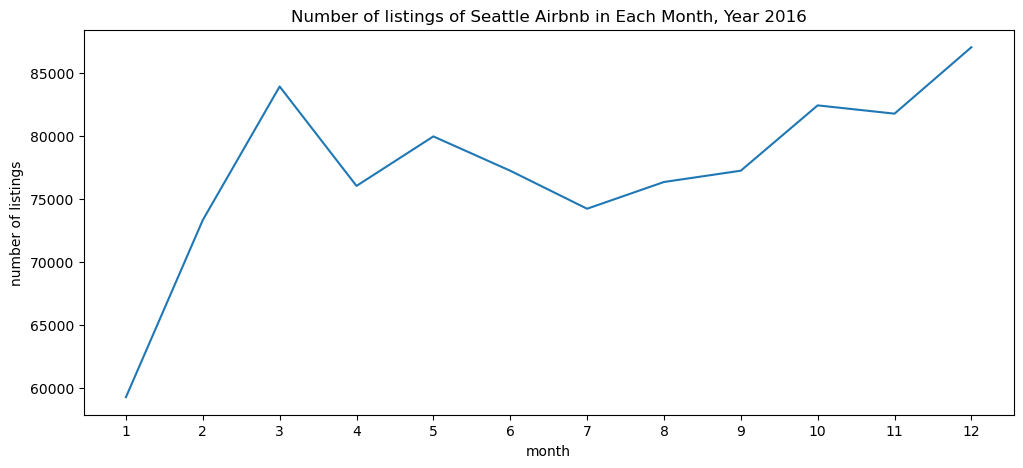

In [26]:
# calculate total number of listings available in each month
numListingSeattle = seattleCal[seattleCal['year'] == 2016].groupby('month').sum()['available']

# plot number of listing in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('number of listings')
plt.title('Number of listings of Seattle Airbnb in Each Month, Year 2016')
plt.plot(numListingSeattle)

In [27]:
# extract price as float based on price column
seattleCal['price'] = seattleCal['price'].str.replace('$', '').str.replace(',', '').astype("float")

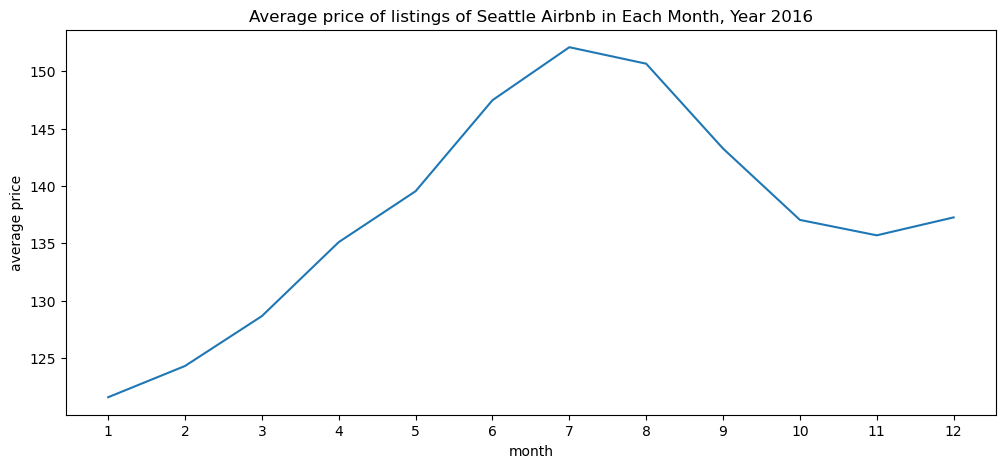

In [28]:
# calculate average price of listings available in each month
avgPriceSeattle = seattleCal[(seattleCal['year'] == 2016) & (seattleCal['available'] == 1)].groupby('month').mean()['price']
# plot average price in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('Average price of listings of Seattle Airbnb in Each Month, Year 2016')
plt.plot(avgPriceSeattle)

### Boston 

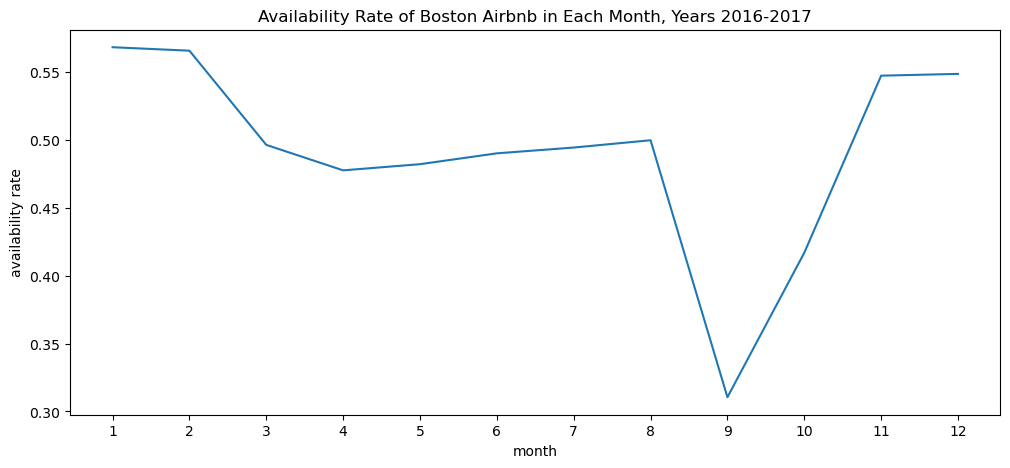

In [29]:
# calculate availablity rate
availabilityRateBoston = bostonCal[(bostonCal['year'] == 2016) | (bostonCal['year'] == 2017)].groupby('month').mean()['available']

# plot availablity rate in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('availability rate')
plt.title('Availability Rate of Boston Airbnb in Each Month, Years 2016-2017')
plt.plot(availabilityRateBoston)

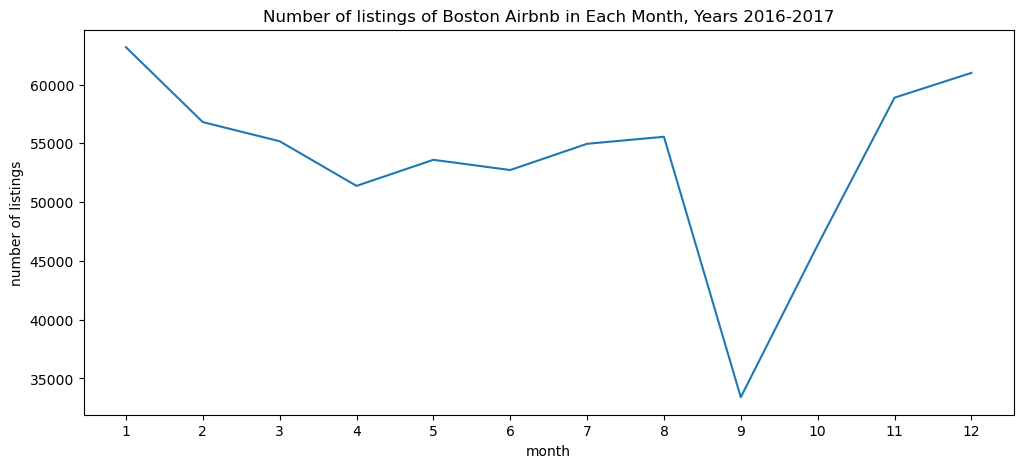

In [30]:
# calculate total number of listings available in each month
numListingBoston = bostonCal[(bostonCal['year'] == 2016) | (bostonCal['year'] == 2017)].groupby('month').sum()['available']

# plot number of listing in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('number of listings')
plt.title('Number of listings of Boston Airbnb in Each Month, Years 2016-2017')
plt.plot(numListingBoston)

In [31]:
# extract price as float based on price column
bostonCal['price'] = bostonCal['price'].str.replace('$', '').str.replace(',', '').astype("float")

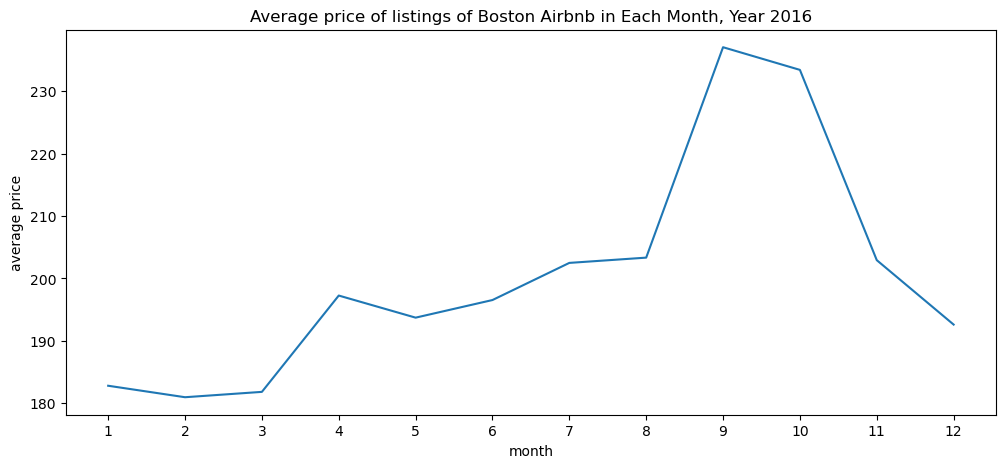

In [32]:
# calculate average price of listings available in each month
avgPriceBoston = bostonCal[(bostonCal['year'] == 2016) | (bostonCal['year'] == 2017) & (bostonCal['available'] == 1)].groupby('month').mean()['price']
# plot average price in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('Average price of listings of Boston Airbnb in Each Month, Year 2016')
plt.plot(avgPriceBoston)

### Overall

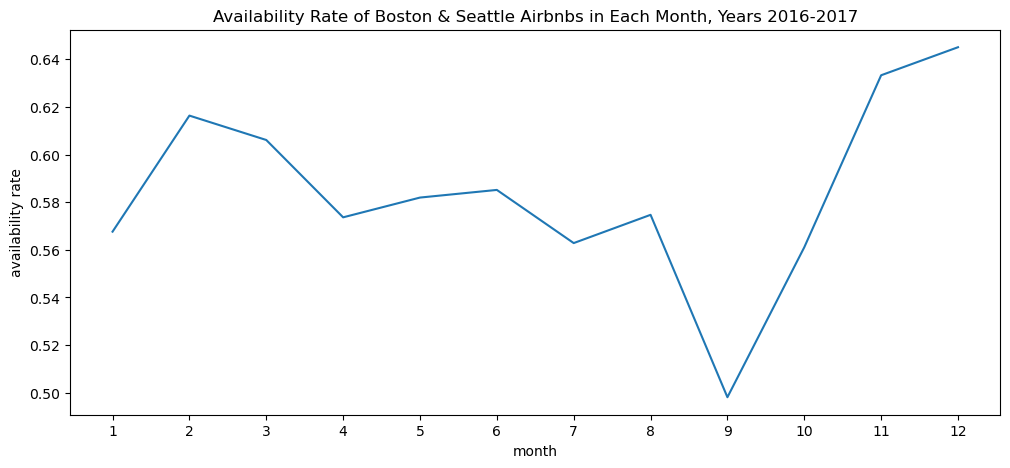

In [33]:
# calculate availablity rate
availabilityRate = airbnbCal[(airbnbCal['year'] == 2016) | (airbnbCal['year'] == 2017)].groupby('month').mean()['available']

# plot availablity rate in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('availability rate')
plt.title('Avg. Availability Rate of Boston & Seattle Airbnbs in Each Month, Years 2016-2017')
plt.plot(availabilityRate)

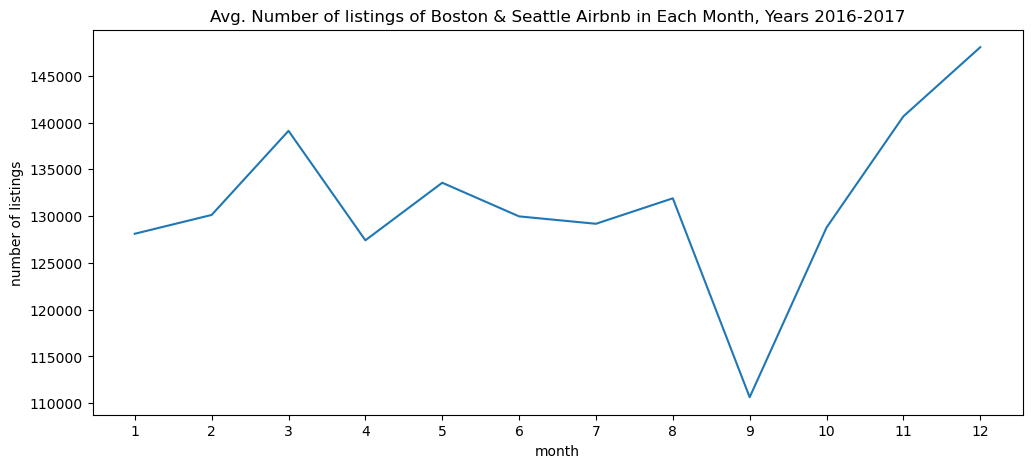

In [94]:
# calculate total number of listings available in each month
numListing = airbnbCal[(airbnbCal['year'] == 2016) | (airbnbCal['year'] == 2017)].groupby('month').sum()['available']

# plot number of listing in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('number of listings')
plt.title('Avg. Number of listings of Boston & Seattle Airbnb in Each Month, Years 2016-2017')
plt.plot(numListing)

In [35]:
# extract price as float based on price column
airbnbCal['price'] = airbnbCal['price'].str.replace('$', '').str.replace(',', '').astype("float")

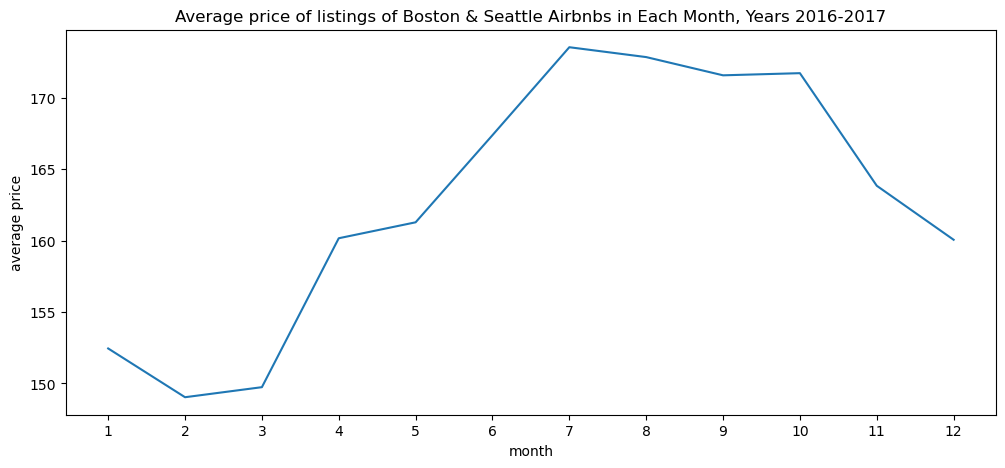

In [36]:
# calculate average price of listings available in each month
avgPrice = airbnbCal[(airbnbCal['year'] == 2016) | (airbnbCal['year'] == 2017) & (airbnbCal['available'] == 1)].groupby('month').mean()['price']
# plot average price in each month
fig, ax = plt.subplots(1, 1, figsize = (12, 5))
ax.set_xticks(list(range(1,13)))
plt.xlabel('month')
plt.ylabel('average price')
plt.title('Average price of listings of Boston & Seattle Airbnbs in Each Month, Years 2016-2017')
plt.plot(avgPrice)

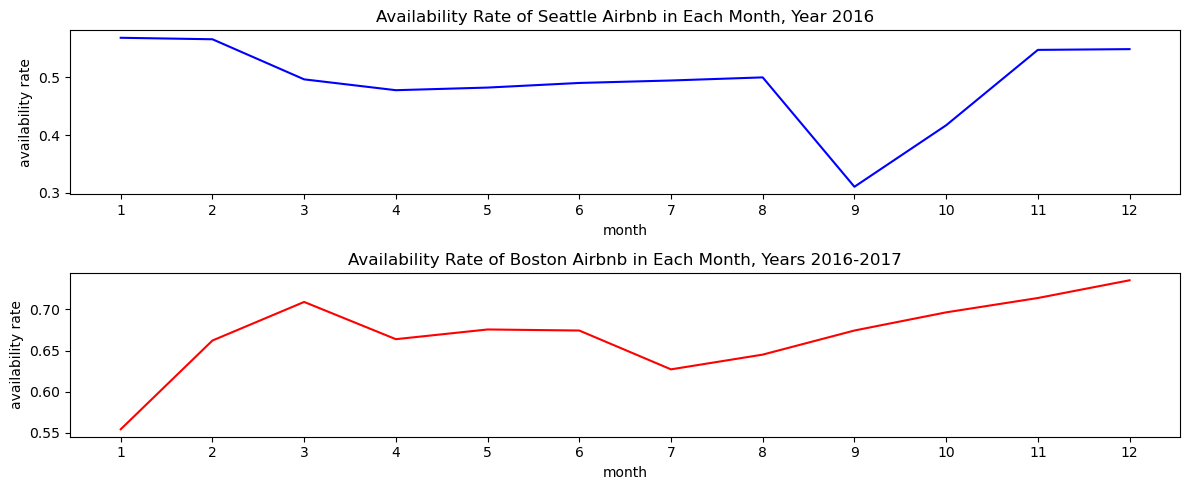

In [99]:
# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 5))

# plot average price in first subplot
ax1.set_xticks(list(range(1,13)))
ax1.set_xlabel('month')
ax1.set_ylabel('availability rate')
ax1.set_title('Availability Rate of Seattle Airbnb in Each Month, Year 2016')
ax1.plot(availabilityRateBoston, color='blue')

# plot number of listings in second subplot
ax2.set_xticks(list(range(1,13)))
ax2.set_xlabel('month')
ax2.set_ylabel('availability rate')
ax2.set_title('Availability Rate of Boston Airbnb in Each Month, Years 2016-2017')
ax2.plot(availabilityRateSeattle, color='red')

plt.tight_layout()  # adjust spacing between subplots
plt.show()

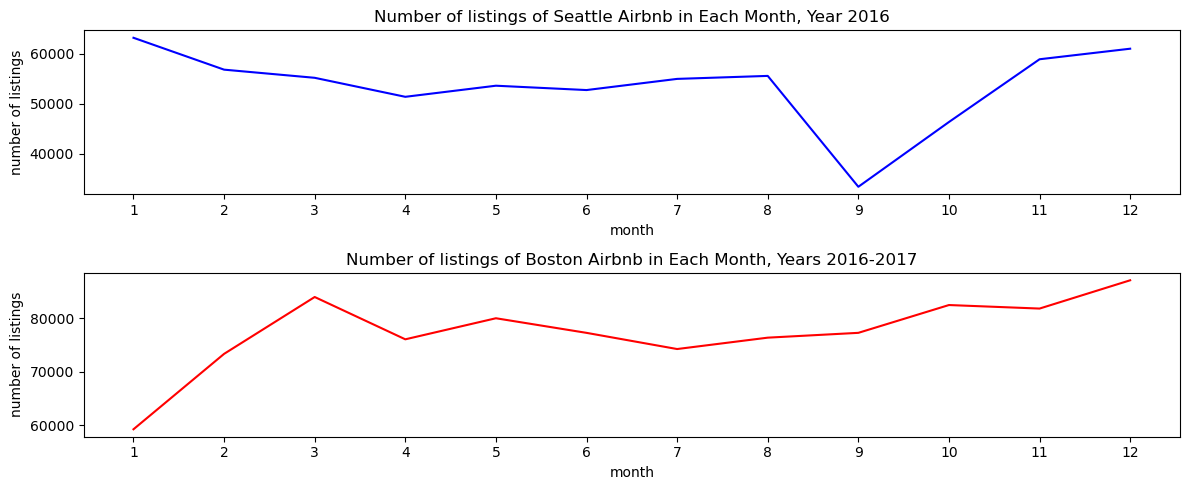

In [100]:
# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 5))

# plot average price in first subplot
ax1.set_xticks(list(range(1,13)))
ax1.set_xlabel('month')
ax1.set_ylabel('number of listings')
ax1.set_title('Number of listings of Seattle Airbnb in Each Month, Year 2016')
ax1.plot(numListingBoston, color='blue')

# plot number of listings in second subplot
ax2.set_xticks(list(range(1,13)))
ax2.set_xlabel('month')
ax2.set_ylabel('number of listings')
ax2.set_title('Number of listings of Boston Airbnb in Each Month, Years 2016-2017')
ax2.plot(numListingSeattle, color='red')

plt.tight_layout()  # adjust spacing between subplots
plt.show()

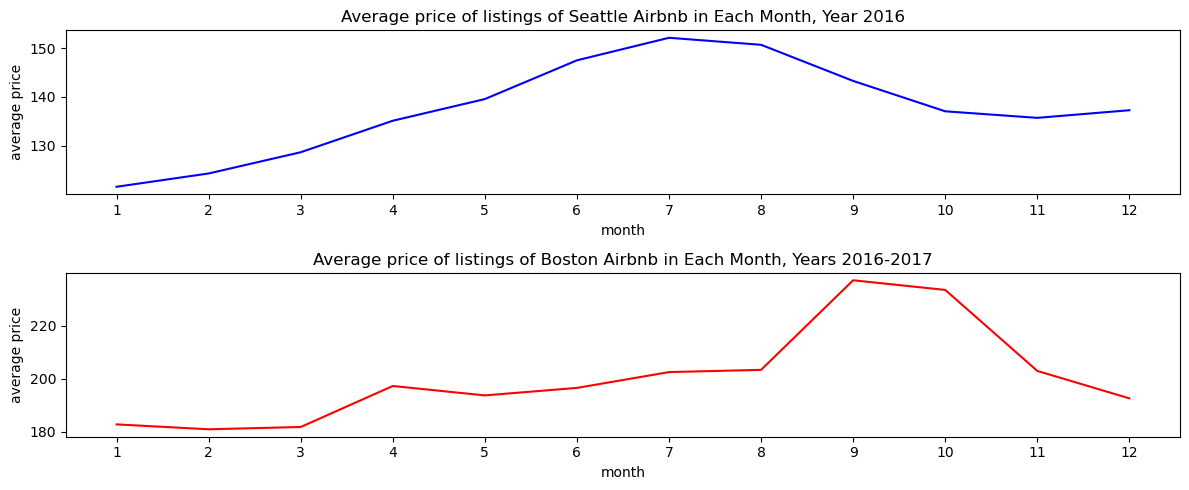

In [101]:
# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 5))

# plot average price in first subplot
ax1.set_xticks(list(range(1,13)))
ax1.set_xlabel('month')
ax1.set_ylabel('average price')
ax1.set_title('Average price of listings of Seattle Airbnb in Each Month, Year 2016')
ax1.plot(avgPriceSeattle, color='blue')

# plot number of listings in second subplot
ax2.set_xticks(list(range(1,13)))
ax2.set_xlabel('month')
ax2.set_ylabel('average price')
ax2.set_title('Average price of listings of Boston Airbnb in Each Month, Years 2016-2017')
ax2.plot(avgPriceBoston, color='red')

plt.tight_layout()  # adjust spacing between subplots
plt.show()

# Variation of Airbnb listings between neighborhoods

# Clean

In [37]:
# Create datasets for analysis
selectedCol = ['review_scores_value','accommodates', 'bathrooms', 'bedrooms', 'beds', 'cancellation_policy', "id",
                'host_is_superhost', 'extra_people', 'property_type', 'room_type', 'price', 'neighbourhood_cleansed'] 

seattleList1 = seattleList[selectedCol]
bostonList1 = bostonList[selectedCol]
airbnbList1 = airbnbList[selectedCol]

In [38]:
# prepare listing dataset for analysis
# Seattle
seattleList1['price'] = seattleList1['price'].str.replace('$', '').str.replace(',', '').astype("float")
seattleList1['extra_people'] = seattleList1['extra_people'].str.replace('$', '').str.replace(',', '').astype("float")
seattleList1['host_is_superhost'] = seattleList1['host_is_superhost'].map({'f': 0, 't': 1})

# Seattle
bostonList1['price'] = bostonList1['price'].str.replace('$', '').str.replace(',', '').astype("float")
bostonList1['extra_people'] = bostonList1['extra_people'].str.replace('$', '').str.replace(',', '').astype("float")
bostonList1['host_is_superhost'] = bostonList1['host_is_superhost'].map({'f': 0, 't': 1})

# Seattle
airbnbList1['price'] = airbnbList1['price'].str.replace('$', '').str.replace(',', '').astype("float")
airbnbList1['extra_people'] = airbnbList1['extra_people'].str.replace('$', '').str.replace(',', '').astype("float")
airbnbList1['host_is_superhost'] = airbnbList1['host_is_superhost'].map({'f': 0, 't': 1})

In [39]:
seattleList1.head()

,review_scores_value,accommodates,bathrooms,bedrooms,beds,cancellation_policy,id,host_is_superhost,extra_people,property_type,room_type,price,neighbourhood_cleansed
0,10.0,4,1.0,1.0,1.0,moderate,241032,0.0,5.0,Apartment,Entire home/apt,85.0,West Queen Anne
1,10.0,4,1.0,1.0,1.0,strict,953595,1.0,0.0,Apartment,Entire home/apt,150.0,West Queen Anne
2,10.0,11,4.5,5.0,7.0,strict,3308979,0.0,25.0,House,Entire home/apt,975.0,West Queen Anne
3,NaN,3,1.0,0.0,2.0,flexible,7421966,0.0,0.0,Apartment,Entire home/apt,100.0,West Queen Anne
4,9.0,6,2.0,3.0,3.0,strict,278830,0.0,15.0,House,Entire home/apt,450.0,West Queen Anne


In [40]:
bostonList1.head()

,review_scores_value,accommodates,bathrooms,bedrooms,beds,cancellation_policy,id,host_is_superhost,extra_people,property_type,room_type,price,neighbourhood_cleansed
0,NaN,4,1.5,2.0,3.0,moderate,12147973,0,0.0,House,Entire home/apt,250.0,Roslindale
1,9.0,2,1.0,1.0,1.0,moderate,3075044,0,0.0,Apartment,Private room,65.0,Roslindale
2,10.0,2,1.0,1.0,1.0,moderate,6976,1,20.0,Apartment,Private room,65.0,Roslindale
3,10.0,4,1.0,1.0,2.0,moderate,1436513,0,25.0,House,Private room,75.0,Roslindale
4,10.0,2,1.5,1.0,2.0,flexible,7651065,1,0.0,House,Private room,79.0,Roslindale


In [41]:
airbnbList1.head()

,review_scores_value,accommodates,bathrooms,bedrooms,beds,cancellation_policy,id,host_is_superhost,extra_people,property_type,room_type,price,neighbourhood_cleansed
0,NaN,4,1.5,2.0,3.0,moderate,12147973,0.0,0.0,House,Entire home/apt,250.0,Roslindale
1,9.0,2,1.0,1.0,1.0,moderate,3075044,0.0,0.0,Apartment,Private room,65.0,Roslindale
2,10.0,2,1.0,1.0,1.0,moderate,6976,1.0,20.0,Apartment,Private room,65.0,Roslindale
3,10.0,4,1.0,1.0,2.0,moderate,1436513,0.0,25.0,House,Private room,75.0,Roslindale
4,10.0,2,1.5,1.0,2.0,flexible,7651065,1.0,0.0,House,Private room,79.0,Roslindale


## Analysis

### Seattle

In [42]:
# calculate average price of each neighbourhood
seattleList1.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_cleansed,
Southeast Magnolia,231.705882
Portage Bay,227.857143
Westlake,194.470588
West Queen Anne,187.769231
Montlake,182.789474
...,...
North Delridge,76.375000
Georgetown,76.125000
South Delridge,74.666667


In [43]:
# calculate the number of unique of listings in each neighbourhood
seattleList1.groupby('neighbourhood_cleansed').agg({"id": "nunique"}).sort_values('id', ascending = False)

,id
neighbourhood_cleansed,
Broadway,397
Belltown,234
Wallingford,167
Fremont,158
Minor,135
...,...
Arbor Heights,5
South Beacon Hill,4
Pinehurst,4


In [44]:
# function to calculate the count of assigned proporty type for each neighborhood
def getPropNumSeattle(property_type):
    '''
    INPUT:
    property_type - the name of property type you want to analyze
    
    OUTPUT:
    count - a table with the count of proporty type for each neighborhood
    '''
    seattleList1Filtered = seattleList1.loc[seattleList1['property_type'].isin([property_type])]
    count = seattleList1Filtered.groupby(['neighbourhood_cleansed']).count()[['id']]
    count['neighbourhood_cleansed'] = count.index
    count.reset_index(drop = True, inplace = True)
    type_name = "{}_count".format(property_type)
    count.rename({'id': type_name}, axis = 1, inplace = True)
    return(count)

In [45]:
# get the number of house for each neighbourhood
houseCountSeattle = getPropNumSeattle("House")
print(houseCountSeattle)

    House_count neighbourhood_cleansed
0            34                  Adams
1            24                   Alki
2             4          Arbor Heights
3            26               Atlantic
4             1               Belltown
..          ...                    ...
75           42          West Woodland
76            2               Westlake
77           17       Whittier Heights
78            7             Windermere
79            1         Yesler Terrace

[80 rows x 2 columns]


In [46]:
# get the number of apartment for each neighbourhood
aptCountSeattle = getPropNumSeattle("Apartment")
print(aptCountSeattle)

    Apartment_count neighbourhood_cleansed
0                27                  Adams
1                13                   Alki
2                17               Atlantic
3               208               Belltown
4                 3            Bitter Lake
..              ...                    ...
75               17          West Woodland
76               10               Westlake
77                7       Whittier Heights
78                3             Windermere
79               14         Yesler Terrace

[80 rows x 2 columns]


### Boston

In [47]:
# calculate average price of each neighbourhood
bostonList1.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_cleansed,
South Boston Waterfront,306.060241
Bay Village,266.833333
Leather District,253.600000
Back Bay,240.950331
Downtown,236.459302
Chinatown,232.352113
Beacon Hill,224.443299
Fenway,220.393103
West End,209.591837


In [48]:
# calculate the number of unique of listings in each neighbourhood
bostonList1.groupby('neighbourhood_cleansed').agg({"id": "nunique"}).sort_values('id', ascending = False)

,id
neighbourhood_cleansed,
Jamaica Plain,343
South End,326
Back Bay,302
Fenway,290
Dorchester,269
Allston,260
Beacon Hill,194
Brighton,185
South Boston,174


In [49]:
# function to calculate the count of assigned proporty type for each neighborhood
def getPropNumBoston(property_type):
    '''
    INPUT:
    property_type - the name of property type you want to analyze
    
    OUTPUT:
    count - a table with the count of proporty type for each neighborhood
    '''
    bostonList1Filtered = bostonList1.loc[bostonList1['property_type'].isin([property_type])]
    count = bostonList1Filtered.groupby(['neighbourhood_cleansed']).count()[['id']]
    count['neighbourhood_cleansed'] = count.index
    count.reset_index(drop = True, inplace = True)
    type_name = "{}_count".format(property_type)
    count.rename({'id': type_name}, axis = 1, inplace = True)
    return(count)

In [50]:
# get the number of house for each neighbourhood
houseCountBoston = getPropNumBoston("House")
print(houseCountBoston)

    House_count   neighbourhood_cleansed
0            71                  Allston
1             2                 Back Bay
2             5              Bay Village
3             4              Beacon Hill
4            46                 Brighton
5            21              Charlestown
6            82               Dorchester
7             2                 Downtown
8            22              East Boston
9             2                   Fenway
10           21                Hyde Park
11           98            Jamaica Plain
12           17                 Mattapan
13           18             Mission Hill
14            5                North End
15           32               Roslindale
16           38                  Roxbury
17           37             South Boston
18            1  South Boston Waterfront
19            9                South End
20           29             West Roxbury


In [51]:
# get the number of apartment for each neighbourhood
aptCountBoston = getPropNumBoston("Apartment")
print(aptCountBoston)

    Apartment_count   neighbourhood_cleansed
0               177                  Allston
1               271                 Back Bay
2                13              Bay Village
3               174              Beacon Hill
4               121                 Brighton
5                66              Charlestown
6                66                Chinatown
7               161               Dorchester
8               146                 Downtown
9               108              East Boston
10              276                   Fenway
11                7                Hyde Park
12              192            Jamaica Plain
13                2         Leather District
14                6    Longwood Medical Area
15                5                 Mattapan
16               95             Mission Hill
17              121                North End
18               17               Roslindale
19               95                  Roxbury
20               91             South Boston
21        

### Overall

In [52]:
# calculate average price of each neighbourhood
airbnbList1.groupby('neighbourhood_cleansed').mean().sort_values('price', ascending = False)[['price']]

,price
neighbourhood_cleansed,
South Boston Waterfront,306.060241
Bay Village,266.833333
Leather District,253.600000
Back Bay,240.950331
Downtown,236.459302
...,...
Georgetown,76.125000
Mattapan,75.125000
South Delridge,74.666667


In [53]:
# calculate the number of unique of listings in each neighbourhood
airbnbList1.groupby('neighbourhood_cleansed').agg({"id": "nunique"}).sort_values('id', ascending = False)

,id
neighbourhood_cleansed,
Broadway,397
Jamaica Plain,343
South End,326
Back Bay,302
Fenway,290
...,...
Leather District,5
South Beacon Hill,4
Pinehurst,4


In [54]:
# function to calculate the count of assigned proporty type for each neighborhood
def getPropNum(property_type):
    '''
    INPUT:
    property_type - the name of property type you want to analyze
    
    OUTPUT:
    count - a table with the count of proporty type for each neighborhood
    '''
    airbnbList1Filtered = airbnbList1.loc[airbnbList1['property_type'].isin([property_type])]
    count = airbnbList1Filtered.groupby(['neighbourhood_cleansed']).count()[['id']]
    count['neighbourhood_cleansed'] = count.index
    count.reset_index(drop = True, inplace = True)
    type_name = "{}_count".format(property_type)
    count.rename({'id': type_name}, axis = 1, inplace = True)
    return(count)

In [55]:
# get the number of house for each neighbourhood
houseCount = getPropNum("House")
print(houseCount)

    House_count neighbourhood_cleansed
0            34                  Adams
1            24                   Alki
2            71                Allston
3             4          Arbor Heights
4            26               Atlantic
..          ...                    ...
95           42          West Woodland
96            2               Westlake
97           17       Whittier Heights
98            7             Windermere
99            1         Yesler Terrace

[100 rows x 2 columns]


In [56]:
# get the number of apartment for each neighbourhood
aptCount = getPropNum("Apartment")
print(aptCount)

     Apartment_count neighbourhood_cleansed
0                 27                  Adams
1                 13                   Alki
2                177                Allston
3                 17               Atlantic
4                271               Back Bay
..               ...                    ...
99                17          West Woodland
100               10               Westlake
101                7       Whittier Heights
102                3             Windermere
103               14         Yesler Terrace

[104 rows x 2 columns]


## Visualization

### Seattle

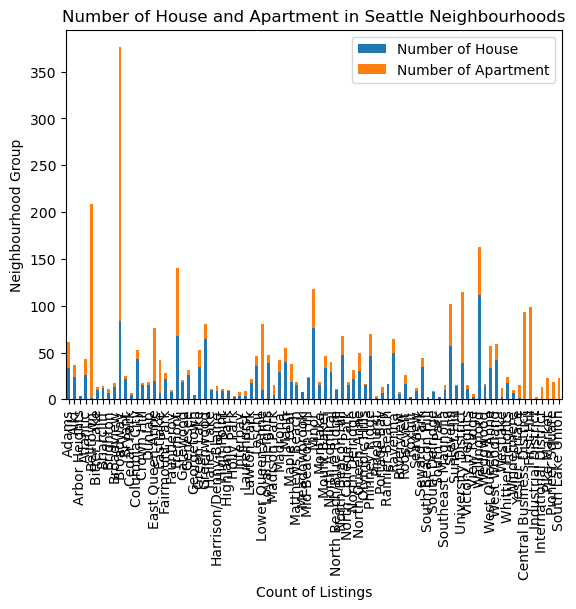

In [57]:
# plot the number of house and apartment in Seattle neighbourhoods
dfPlotSeattle = houseCountSeattle.merge(aptCountSeattle, how = "outer", on = "neighbourhood_cleansed")
dfPlotSeattle.plot(x = 'neighbourhood_cleansed', kind = 'bar', stacked = True)
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.legend(["Number of House", "Number of Apartment"])
plt.title("Number of House and Apartment in Seattle Neighbourhoods");

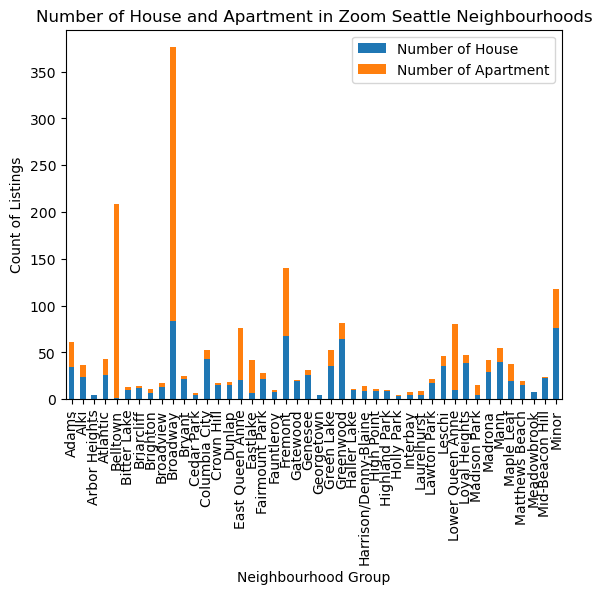

In [119]:
# sort dataframe by number of listings in descending order
dfPlotSeattle = houseCountSeattle.merge(aptCountSeattle, how = "outer", on = "neighbourhood_cleansed")

# plot first 44 neighborhoods
dfPlotSeattle[:44].plot(x = 'neighbourhood_cleansed', kind = 'bar', stacked = True)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of Listings")
plt.legend(["Number of House", "Number of Apartment"])
plt.title("Number of House and Apartment in Zoom Seattle Neighbourhoods");

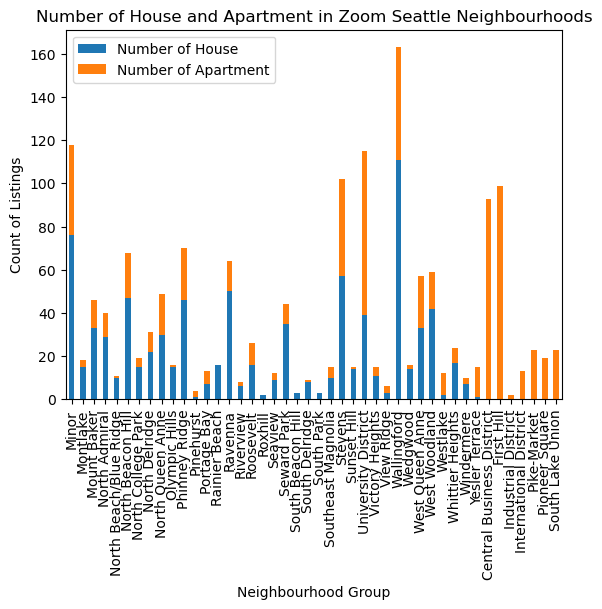

In [118]:
# plot last 44 neighborhoods
dfPlotSeattle[-44:].plot(x = 'neighbourhood_cleansed', kind = 'bar', stacked = True)
plt.xlabel("Neighbourhood Group")
plt.ylabel("Count of Listings")
plt.legend(["Number of House", "Number of Apartment"])
plt.title("Number of House and Apartment in Zoom Seattle Neighbourhoods");

### Boston

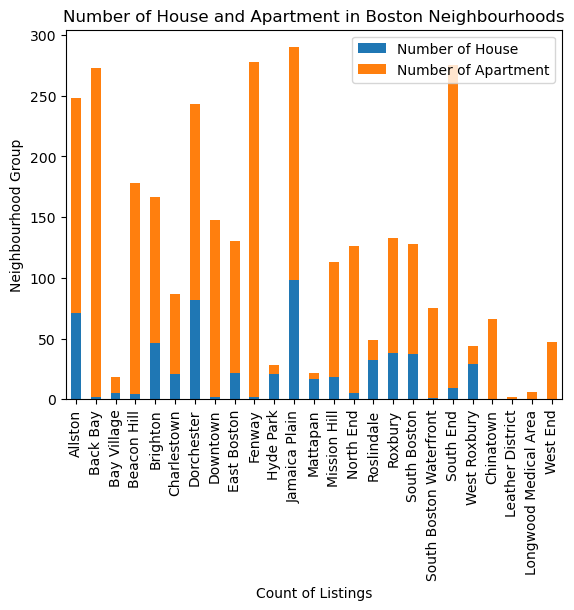

In [58]:
# plot the number of house and apartment in Boston neighbourhoods
dfPlotBoston = houseCountBoston.merge(aptCountBoston, how = "outer", on = "neighbourhood_cleansed")
dfPlotBoston.plot(x = 'neighbourhood_cleansed', kind = 'bar', stacked = True)
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.legend(["Number of House", "Number of Apartment"])
plt.title("Number of House and Apartment in Boston Neighbourhoods");

### Overall

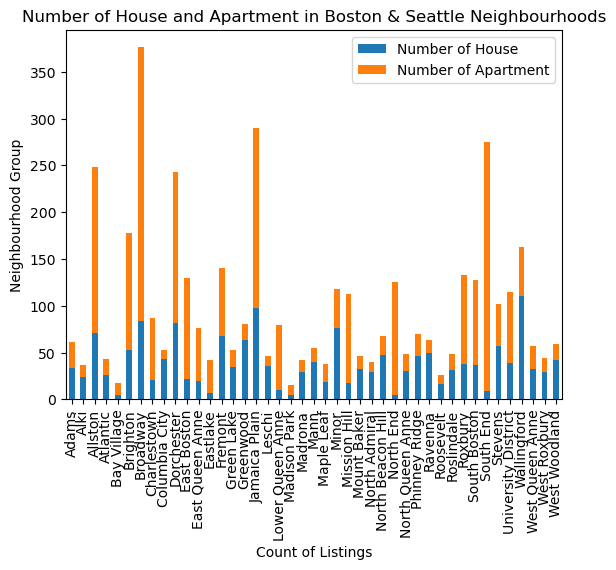

In [59]:
# plot the number of house and apartment in Boston neighbourhoods
dfPlot = houseCount.merge(aptCount, how = "outer", on = "neighbourhood_cleansed")
dfPlot = dfPlot[(dfPlot['House_count'] >= 5) & (dfPlot['Apartment_count'] >= 10)]
dfPlot.plot(x = 'neighbourhood_cleansed', kind = 'bar', stacked = True)
plt.xlabel("Count of Listings")
plt.ylabel("Neighbourhood Group")
plt.legend(["Number of House", "Number of Apartment"])
plt.title("Number of House and Apartment in Boston & Seattle Neighbourhoods");

# Main factors that affect the price of an airbnb

## Clean

### Seattle

<AxesSubplot:>

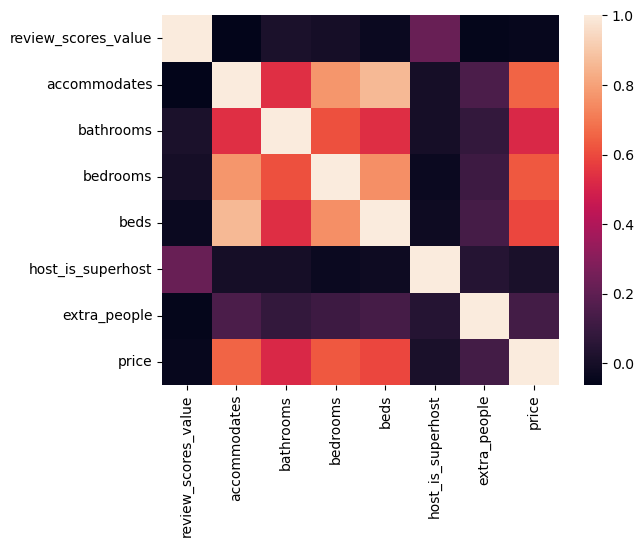

In [60]:
# Generate correlation heatmap
seattleListModel = seattleList1.drop('id', axis=1)
sns.heatmap(seattleListModel.corr())

In [61]:
# Check for missing values in price
seattleListModel['price'].isnull().value_counts()

False    3818
Name: price, dtype: int64

In [62]:
seattleListModel.isnull().sum()

review_scores_value       656
accommodates                0
bathrooms                  16
bedrooms                    6
beds                        1
cancellation_policy         0
host_is_superhost           2
extra_people                0
property_type               1
room_type                   0
price                       0
neighbourhood_cleansed      0
dtype: int64

In [63]:
# Drop review_scores_value
seattleListModel.drop('review_scores_value', axis=1, inplace=True)

In [64]:
# Impute other columns
fillByMode = lambda col: col.fillna(col.mode()[0])
listingModelFillSeattle = seattleListModel.apply(fillByMode)

In [65]:
listingModelFillSeattle.isnull().sum()

accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
cancellation_policy       0
host_is_superhost         0
extra_people              0
property_type             0
room_type                 0
price                     0
neighbourhood_cleansed    0
dtype: int64

In [66]:
# Generate dummy variables for cat variables
listingModelDummySeattle = pd.get_dummies(listingModelFillSeattle, drop_first = True)
listingModelDummySeattle

,accommodates,bathrooms,bedrooms,beds,host_is_superhost,extra_people,price,cancellation_policy_moderate,cancellation_policy_strict,property_type_Bed & Breakfast,...,neighbourhood_cleansed_Victory Heights,neighbourhood_cleansed_View Ridge,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,4,1.0,1.0,1.0,0.0,5.0,85.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4,1.0,1.0,1.0,1.0,0.0,150.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,11,4.5,5.0,7.0,0.0,25.0,975.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,3,1.0,0.0,2.0,0.0,0.0,100.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,6,2.0,3.0,3.0,0.0,15.0,450.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,0.0,0.0,359.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3814,4,1.0,1.0,2.0,0.0,25.0,79.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3815,2,1.0,1.0,1.0,0.0,20.0,93.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3816,2,1.0,0.0,1.0,0.0,0.0,99.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Boston

<AxesSubplot:>

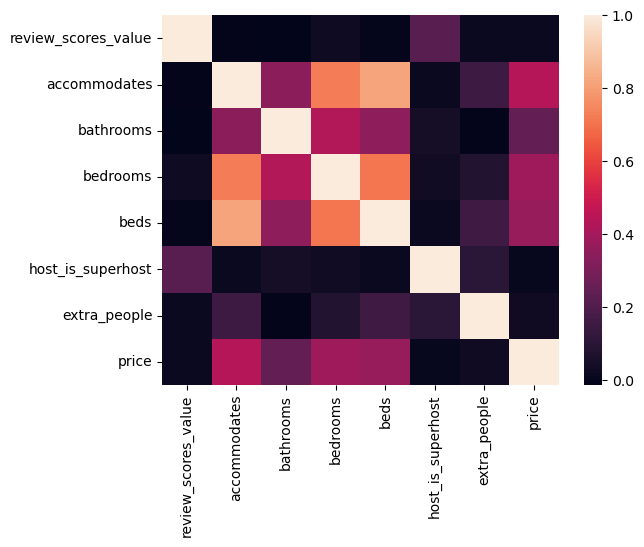

In [67]:
# Generate correlation heatmap
bostonListModel = bostonList1.drop('id', axis=1)
sns.heatmap(bostonListModel.corr())

In [68]:
# Check for missing values in price
bostonListModel['price'].isnull().value_counts()

False    3585
Name: price, dtype: int64

In [69]:
bostonListModel.isnull().sum()

review_scores_value       821
accommodates                0
bathrooms                  14
bedrooms                   10
beds                        9
cancellation_policy         0
host_is_superhost           0
extra_people                0
property_type               3
room_type                   0
price                       0
neighbourhood_cleansed      0
dtype: int64

In [70]:
# Drop review_scores_value
bostonListModel.drop('review_scores_value', axis=1, inplace=True)

In [71]:
# Impute other columns
fillByModeBoston = lambda col: col.fillna(col.mode()[0])
listingModelFillBoston = bostonListModel.apply(fillByModeBoston)

In [72]:
# check to make sure there is no missing value
listingModelFillBoston.isnull().sum()

accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
cancellation_policy       0
host_is_superhost         0
extra_people              0
property_type             0
room_type                 0
price                     0
neighbourhood_cleansed    0
dtype: int64

In [73]:
# Generate dummy variables for cat variables
listingModelDummyBoston = pd.get_dummies(listingModelFillBoston, drop_first = True)
listingModelDummyBoston

,accommodates,bathrooms,bedrooms,beds,host_is_superhost,extra_people,price,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,...,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury
0,4,1.5,2.0,3.0,0,0.0,250.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,1.0,1.0,1.0,0,0.0,65.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,1.0,1.0,1.0,1,20.0,65.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,1.0,1.0,2.0,0,25.0,75.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,1.5,1.0,2.0,1,0.0,79.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,3,1.0,1.0,1.0,0,24.0,69.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3581,2,1.0,1.0,1.0,0,0.0,150.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3582,4,1.0,1.0,1.0,0,0.0,198.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3583,2,1.0,1.0,1.0,0,30.0,65.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Overall

<AxesSubplot:>

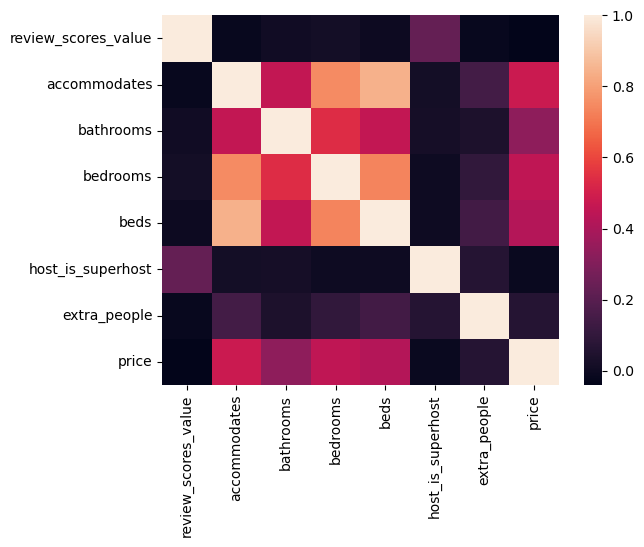

In [74]:
# Generate correlation heatmap
airbnbListModel = airbnbList1.drop('id', axis=1)
sns.heatmap(airbnbListModel.corr())

In [75]:
# Check for missing values in price
airbnbListModel['price'].isnull().value_counts()

False    7403
Name: price, dtype: int64

In [76]:
airbnbListModel.isnull().sum()

review_scores_value       1477
accommodates                 0
bathrooms                   30
bedrooms                    16
beds                        10
cancellation_policy          0
host_is_superhost            2
extra_people                 0
property_type                4
room_type                    0
price                        0
neighbourhood_cleansed       0
dtype: int64

In [77]:
# Drop review_scores_value
airbnbListModel.drop('review_scores_value', axis=1, inplace=True)

In [78]:
# Impute other columns
fillByModeAirbnb = lambda col: col.fillna(col.mode()[0])
listingModelFillAirbnb = airbnbListModel.apply(fillByModeAirbnb)

In [79]:
# check to make sure there is no missing value
listingModelFillAirbnb.isnull().sum()

accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
cancellation_policy       0
host_is_superhost         0
extra_people              0
property_type             0
room_type                 0
price                     0
neighbourhood_cleansed    0
dtype: int64

In [80]:
# Generate dummy variables for cat variables
listingModelDummyAirbnb = pd.get_dummies(listingModelFillAirbnb, drop_first = True)
listingModelDummyAirbnb

,accommodates,bathrooms,bedrooms,beds,host_is_superhost,extra_people,price,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,...,neighbourhood_cleansed_Wallingford,neighbourhood_cleansed_Wedgwood,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Queen Anne,neighbourhood_cleansed_West Roxbury,neighbourhood_cleansed_West Woodland,neighbourhood_cleansed_Westlake,neighbourhood_cleansed_Whittier Heights,neighbourhood_cleansed_Windermere,neighbourhood_cleansed_Yesler Terrace
0,4,1.5,2.0,3.0,0.0,0.0,250.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1.0,1.0,0.0,0.0,65.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1.0,1.0,1.0,1.0,20.0,65.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1.0,1.0,2.0,0.0,25.0,75.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1.5,1.0,2.0,1.0,0.0,79.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,6,2.0,3.0,3.0,0.0,0.0,359.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3814,4,1.0,1.0,2.0,0.0,25.0,79.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3815,2,1.0,1.0,1.0,0.0,20.0,93.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3816,2,1.0,0.0,1.0,0.0,0.0,99.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Model

### Seattle

In [81]:
# split training and test data
y_seattle = listingModelDummySeattle['price']
x_seattle = listingModelDummySeattle.drop('price', axis = 1)

In [82]:
# fit a random forest model
modelSeattle = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 1, n_jobs = -1)
modelSeattle.fit(x_seattle, y_seattle)

RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=1)

<AxesSubplot:>

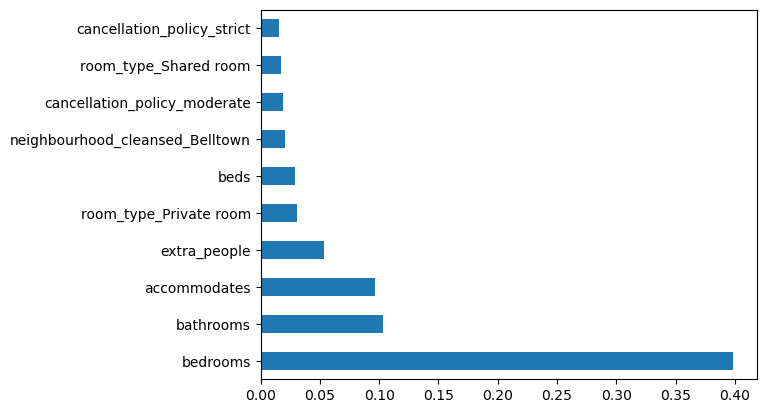

In [83]:
# plot feature importance by variable
featImpSeattle = pd.Series(modelSeattle.feature_importances_, index=x_seattle.columns).sort_values()
featImpSeattle.nlargest(10).plot(kind = 'barh')

### Boston

In [84]:
# split training and test data
y_boston = listingModelDummyBoston['price']
x_boston = listingModelDummyBoston.drop('price', axis = 1)

In [85]:
# fit a random forest model
modelBoston = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 1, n_jobs = -1)
modelBoston.fit(x_boston, y_boston)

RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=1)

<AxesSubplot:>

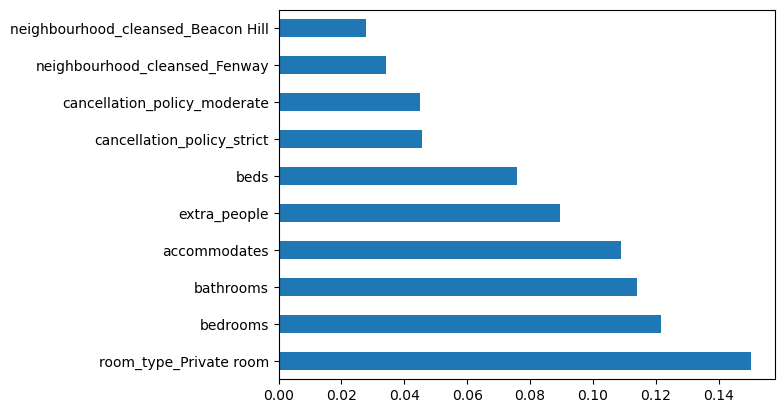

In [86]:
# plot feature importance by variable
featImpBoston = pd.Series(modelBoston.feature_importances_, index=x_boston.columns).sort_values()
featImpBoston.nlargest(10).plot(kind = 'barh')

### Overall

In [87]:
# split training and test data
y_airbnb = listingModelDummyAirbnb['price']
x_airbnb = listingModelDummyAirbnb.drop('price', axis = 1)

In [88]:
# fit a random forest model
modelAirbnb = RandomForestRegressor(n_estimators = 500, criterion = 'mse', random_state = 1, n_jobs = -1)
modelAirbnb.fit(x_airbnb, y_airbnb)

RandomForestRegressor(criterion='mse', n_estimators=500, n_jobs=-1,
                      random_state=1)

<AxesSubplot:>

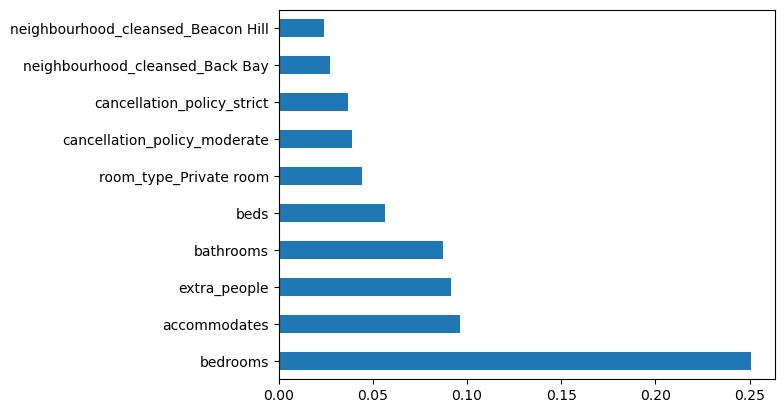

In [89]:
# plot feature importance by variable
featImpAirbnb = pd.Series(modelAirbnb.feature_importances_, index=x_airbnb.columns).sort_values()
featImpAirbnb.nlargest(10).plot(kind = 'barh')

## Export Data for Tableau

### Seattle